https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/?__s=sedr9swwqoxuschybcvu

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

In [3]:
X.shape

(1000, 20)

In [4]:
y.shape

(1000,)

In [5]:
from sklearn.pipeline import Pipeline

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
from sklearn.decomposition import PCA

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Etapes du pipeline :
#
# 1/ Normalisaion
# 2/ ACP
# 3/ Régression Logistique

steps = [ ( 'norm' , MinMaxScaler( ) ) ,
          ('pca', PCA( n_components = 10 ) ) ,
          ( 'm' , LogisticRegression( ) ) ]

In [24]:
model = Pipeline( steps = steps )

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [26]:
cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 1 )

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
n_scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )

In [29]:
from numpy import mean

from numpy import std

In [30]:
mean( n_scores )

0.8106532319898657

In [31]:
std( n_scores )

0.034094965178322

# Best Reduction

In [32]:
def get_models( ) :
    
    models = dict( )
    
    for i in range( 1 , 21 ) :
        
        steps = [ ( 'norm' , MinMaxScaler( ) ) , 
                  ( 'pca' , PCA( n_components = i ) ) ,
                  ( 'm' , LogisticRegression( ) ) ]
        
        models[ str(i) ] = Pipeline( steps = steps )
        
    return models

In [34]:
def evaluate_model( model ) :
    
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 1 )
    
    scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 , error_score = 'raise' )
    
    return scores

In [38]:
models = get_models( )

results = list( )

names = list( )

for name , model in models.items( ) :
    
    scores = evaluate_model( model )
    
    results.append( scores )
    
    names.append( name )
    
    print( name , mean( scores ) , std( scores ) )

1 0.6866341300796748 0.05162129387307981
2 0.7440082674934161 0.043070602426598735
3 0.7463418008467513 0.04783814456200933
4 0.7513418008467512 0.04374848765672596
5 0.7663157315731574 0.03857836081525161
6 0.7923229989665633 0.03965748769885087
7 0.7933162649598294 0.039486196712481526
8 0.7952996299629962 0.034906841471094005
9 0.8106398306497318 0.03297058387899571
10 0.8106532319898657 0.034094965178322
11 0.8116365969930326 0.03614356245313049
12 0.8219933660032672 0.03257134701941713
13 0.8253266993366002 0.03360683979759072
14 0.8526606327299397 0.029867105673500483
15 0.8520108010801078 0.030986897793612113
16 0.8520108010801078 0.030986897793612113
17 0.8520108010801078 0.030986897793612113
18 0.8520108010801078 0.030986897793612113
19 0.8520108010801078 0.030986897793612113
20 0.8520108010801078 0.030986897793612113


In [ ]:
# Nombre de composantes principales à retenir : 14

In [39]:
from matplotlib import pyplot

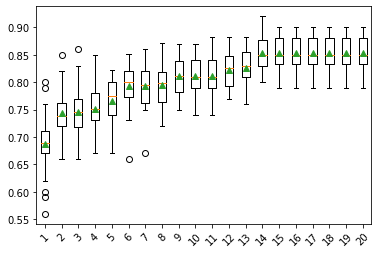

In [41]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.xticks( rotation = 45 )

pyplot.show( )